
# Predictive Modelling of Revenues of Modern American Movies 
#### by Stephen Gou
#### Oct 28, 2018
#### Student Number: 1000382908

## Introduction

A movie's box office is the most common metric to gauge its success. A good prediction of the revenue of a movie can guide production companies for building successful movies, and inform investors to pick out the most profitable movies. This project builds a model that predicts a movie's total revenue, given certain traits and facts about the movie. Only movies produced in the United States from 1990 to 2016 are considered, because the entertainment industry and economy changes over time. Movies produced after 2016 are not considered, because have not reached their full total revenue potential. Only movies produced in the U.S are considered, because the market characteristics vary over countries and the modelling of this aspect is beyond the scope of this project.
     
To build an effective predictive model and gain insight, the project first explores and analyzes the major factors that affect a movie's revenue. And then, a model that best suits the case will be selected and trained. Its performance will be analyzed and compared to an alternative model. Last but not least, the model's limitations and potential improvements will be discussed.
    
## Data Collection
This project makes use of several sources to collect data for analysis and training. Various types of data are collected that includes movie's revenue, budget, meta-data, cast, crews, rankings of actors and actresses and so on. The detail of all the datasets used is listed below.

1) TMDB 5000 Movies dataset. This is the main dataset which provides budget, revenue, runtime, genre, release-date and production country data. Source: https://www.kaggle.com/tmdb/tmdb-movie-metadata

2) New York Times Review dataset. This dataset includes data like whether a movie was picked by NYT critics, and review summaries. Source: NYT API

3) TMDB 5000 Crew dataset. This dataset has detailed cast and crew information, ranging from actor to writer, for each movie. Source: https://www.kaggle.com/tmdb/tmdb-movie-metadata

4) Top Actors/Actresses Rank. This the list of a Top 1000 Actors/Actresses Ranking released by IMDb. Source: IMDb

5) Top directors Rank. This the list of a Directors Ranking released by IMDb. Source: IMDb

6) Annual CPI. This dataset lists the annual average CPI for U.S. Source: UsInflationCalculator.com

### Cleaning
Movies produced before 1990 and after 2016 are discarded. Movies produced outside of U.S are discarded. Some movies have zero revenue in the dataset, which might be a result of missing data or unreleased movie. These movies are removed.

## Feature Selection and Mapping
There are a large amount of factors that might affect a movie's revenues ranging from movies' meta-data, to unemployment rate of the release year. Features that will be analyzed and incorporated into the predictive model are selected based on availability, informativeness, unambiguity, and interpretability. According to this criteria, the following features are selected: budget, runtime, critics-pick, genres, MPAA-rating, cast, and director. The following procedures and transformations of data are done to make data representable for modelling and to increase accuracy.

1) The cast of a movie is represented by a popularity score, which is calculated by the following rule. A percentile rank score for each cast is calculated according to the actors rank dataset. Then use 1 - percentage rank as the popularity score for a cast. So 1 is the highest one can get and 0 is the lowest (0 if cast not in the ranking). Then the cast popularity for the movie is calculated as following:
$$ Cast\ Popularity\ Score = \sum_{i}^{N} \gamma ^ i (1 - Percentile Rank (Cast\ i)) $$ where gamma is a decay factor and N is the number of casts.

2) The director is represented by a popularity score, which is calculated by the following rule. A percentile rank score is calculated according to the directors rank dataset. Then use 1 - percentage rank as the popularity score. So 1 is the highest one can get and 0 is the lowest (0 if director not in the ranking).

3) The revenue and budget are adjusted for inflation according to the rule: $$ adjusted = \frac{CPI(2017)}{CPI(release  \,year)} * unadjusted. $$ CPI are from the Annual CPI data.

4) Genres are converted by one-hot encoding. Note that a movie can have multiple genres associated with it.

5) MPAA ratings are converted by one-hot encoding.

6) Runtime represented by a number and unchanged.

7) Critics pick is represented by 1 or 0 (1 repesents being picked)


## Exploratory Data Analysis
Some observations can be made from the statistics of our wrangled dataset. There are 2,033 movies in our final dataset. 17% of the movies are picked by the critics. Average runtime of a movie is 108 minutes while the lengthiest runs more than 4 hours, the shortest runs 46 mintues.

#### Distributions of Data
![revenue and budget](Images/revenue_budget_boxplot.png)
Revenues and budgets of movies are concentrated in low values, \\$ 78m and \\$ 37m respectively. There are large number of outliers in both cases. However, revenue has very long-tail towards higher values and outliers with more extreme values.

![genres](Images/genres_pie_chart.png)
![rating](Images/mpaa_ratings_pie_chart.png)

There are quite diverse and evenly distributed number of genres in the data. And majority of movies are at least PG-13.

#### Correlations Between Features
A heatmap of correlation between features is plotted to spot features that have strong relationships with each other, so that redundant features can be discarded to reduce multicollinearity.

<img src=Images/corr_heatmap2.png width="800">

Genres and mpaa-rating tend to have strong correlations. From the plot, it's clear that movies that have "family" as a genre is also very likely to have "animation" as a genre as well. Family and animation movies also usually have PG or G rating. 

The quality of the cast appear to be uncorrelated with most of the genres of movies except for horror, where quality of cast drops significantly.

Intuitively, the runtime of a movie has correlations with its genres, which is confirmed by the heatmap. The runtime also correlates with budget and quality of director and cast. 

Another interesting observation is that New York Time's critics' picks appear to be uncorrelated with most of the features of a movie, meaning that they are not favoring a particular subsets of movies over the others. Action and thriller movies are marginally less likely to be picked, but that could just be a result of noise.

From these observations, runtime and mpaa-rating of a movie could be potentially discarded, because they usually depend on other features of the movie.



## Analysis and Modelling
Since the goal is to predict revenue, a continuous value over a wide range, regression models are considered. More specifically, OLS regression, Ridge/Lasso regression, Regression Tree, Random Forest regression and Multilayer Perceptrons are the candidate models. 

Initially, the models' performance are evaluated based on the R-Squared statistic and the residual plot.
An OLS regression model that simply includes all the features without adding higher order terms and interactions is fitted and its result is used as a baseline. Model is trained on training set, which is 70% of the dataset.

It obtained a __R-Squared score of 0.492__ on the test set and the residual plot as below:
![](Images/baseline_residual1.png)

The other models obtained similar results when fitted with only linear terms. Firstly, the R-Squared statistic is not very informative, given that revenue is an unbounded number and there are large number of outliers in the dataset. Secondly, the residual plot displays a clear linear relationship between residual and the revenues of the movies, meaning that there is a significant pattern of revenues of movies that it is not uncovered yet. However, there is inherently large uncertainly of movie's revenue and given limited information there are about the movies. It's necessary to find a more effective metric to evaluate the models.

The alternative metric is defined as the percentage of predictions that are within 20% error from the true value. It will be referred to as "accuracy". The baseline is __34.8%__, which is obtained by simply use the mean revenue for every prediction.

### OLS Linear Regression
Initially, a brute force model that includes a large number of interactions between between features, and certain second order terms (102 total terms in regression formula) is fitted. It obtained accuracy of __49.6%__.

The following steps are taken to improve the performance, interpretability and reduce overfitting.

* Like suggested in EDA, mpaa-rating is discarded because it depends on other features.

* Genres are discarded as well. OLS regression shows an extremely large condition number (> 10^ 10) with genres included, meaning there are strong multi-collinearity. In addition, it caused certain terms to have extremely large weights, even when L1/L2 reguarizers are added. Lastly, in introduced too many potential interactions between each other and other features like directors, actors and budget.

* Naturally removing outliers from dataset was considered, but removing them did not improve any model's performances. Therefore, outliers are kept.

The resulting formula for regression is $$revenue = Intercept + w_0 * runtime + w_1 * budget + w_2 * critics pick + w_4 * cast score + w_5 * director score$$

![](Images/best_linear_ols.png)

It achieved an accuracy of __55.8%__. A 6% increase comparing to the brute force model.
Runtime, budget, and critics pick all have coefficients with lower than 5% p-value, and the coefficents have large values. All else equal, a movie makes \\$ 32m more than it's picked by NYT critics. For every million dollar spent on budget, there are \\$ 2.9m revenue in return. Actors score and director score have coefficients with large P-value, meaning that it cannot be concluded that a great cast or director will surely drive up revenue.

### Non-Linear Regression Models
Given the large number of potential interactions and non-linear relationship between certain features and revenue, it is extremely hard manually select features. Thus, non-linear models like regression tree and multilayer perceptron (neutral networks with only fully connected hidden layers) are considered. For these models, all available features are included in the input.


1) A MLP with two hidden layers of size 5 and 3 with ReLU activations is trained for 2,000 iterations achieved accuracy scores ranging from __47.0%__ to __54.0%__

2) A regression tree with unlimited depth is constructed and achieved accuracy score of __60.7%__
The top few layers of the tree is shown as below:
![](Images/tree_viz.png)

Budget seems to provide the most information gain, as itappear most frequently in top layers. More interestingly, certain genres, seem to have significant effects.  For example, in lower budget movies (budget < \\$ 117m) animation movies average \\$ 340m revenue while the others only average \\$ 160m. For high budget movies (more than\\$ 230), directors that rank in top 25% average \\$ 3000m revenue while others only \\$ 903m.


## Results
we found that xxxx are major factors, yyy not so much.
thus we built a model with ... with zzz model.
Multicollinearity (dummy varaible trap)
## Conclusion
### Future Work
pre-release post release
Actors and directors representation
Incorporate economy/meta data, e.g GDP growth rate of the year of release, unemployment rate.
choose more orthogonal feature

## Python Code

In [206]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
from pandas.io.json import json_normalize
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

### Cleaning and Feature Mapping

In [2]:
github_raw_root = 'Datasets/' #'https://raw.githubusercontent.com/gouzhen1/Moives-Data-Analysis/master/Datasets/'

#NY Reviews Dataset
ny_df = pd.read_csv(github_raw_root + 'NY_movie_reviews.csv')
ny_df.rename(columns={'display_title':'title'},inplace=True)
ny_df = ny_df[['title','mpaa_rating','critics_pick']]

#Wrangle actors and director
#TMDB Credits Dataset (for cast and director)
tmdb_credits_df = pd.read_csv(github_raw_root + 'tmdb_5000_credits.csv')
actors_rank = pd.read_csv(github_raw_root + 'Top_actors_rank.csv')['Name'].tolist()
directors_rank = pd.read_csv(github_raw_root +'All_time_director_rank.csv')['Name'].tolist()
total_actors = len(actors_rank)
total_directors = len(directors_rank)
        
def transform_cast(df):
    cast_json = df['cast']
    parsed_cast = json.loads(cast_json)
    score = 0.
    count = 0 
    for cast in parsed_cast:
        actor = cast['name']
        if actor in actors_rank:
            #discounted for later casts
            score += (0.9 ** count) * (1. - (actors_rank.index(actor)/total_actors))
        count += 1
    return score
tmdb_credits_df['cast_score'] = tmdb_credits_df.apply(transform_cast, axis = 1)

def transform_crew(df):
    crew_json = df['crew']
    parsed_crew = json.loads(crew_json)
    score = 0.
    for crew in parsed_crew:
        if crew['department'] == 'Directing' and crew['job'] == 'Director':
            director = crew['name']
            if director in directors_rank:
                score += (1. - (directors_rank.index(director)/total_directors))
            break
    return score

tmdb_credits_df['director_score'] = tmdb_credits_df.apply(transform_crew, axis = 1)
tmdb_credits_df = tmdb_credits_df[['title','cast_score','director_score']]

#TMDB Main Dataset
main_df = pd.read_csv(github_raw_root + 'tmdb_5000_movies.csv')
main_df['release_date'] = pd.to_datetime(main_df['release_date'])
main_df.drop(main_df[main_df['release_date'].dt.year < 1990].index, inplace=True)
main_df.drop(main_df[main_df['release_date'].dt.year > 2016].index, inplace=True)
main_df = main_df[main_df['revenue'] > 0]
main_df = main_df.merge(ny_df,how='left')
    
#process and filter countries
def process_country(df):
    country_json = df['production_countries']
    parsed_country = json.loads(country_json)
    if len(parsed_country) > 0:
        return parsed_country[0]['name']
    else:
        return None
main_df['production_countries'] = main_df.apply(process_country, axis = 1)
main_df = main_df[main_df['production_countries'] =='United States of America']
main_df.drop(columns='production_countries',inplace=True)

#wrangle genre
genre_dict = {}
def transform_genre(df):
    genre_json = df['genres']
    parsed_genre = json.loads(genre_json)
    result = []
    for genre in parsed_genre:
        genre_name = genre['name'].replace(' ','_')
        result.append(genre_name)
        if genre_name not in genre_dict:
            genre_dict[genre_name] = 1
        else:
            genre_dict[genre_name] += 1
    
    return result
main_df['genres'] = main_df.apply(transform_genre, axis = 1)
#drop very low rare genres
del genre_dict['Foreign']
for genre in genre_dict:
    main_df['is_' + genre] = main_df['genres'].transform(lambda x: int(genre in x))
main_df.drop(columns=['genres'],inplace=True)

#map mpaa rating
rating_df = pd.get_dummies(main_df['mpaa_rating'],prefix='rating')
main_df = main_df.merge(rating_df,left_index=True,right_index=True)
main_df.drop(columns=['mpaa_rating','rating_Not Rated'],inplace=True) #drop one category to avoid multicollinearity

#adjust revenue and budget for inflation
cpi_df = pd.read_csv(github_raw_root + 'Annual_CPI.csv')
cpi_df = cpi_df.set_index('DATE')
cpi_dict = cpi_df.to_dict()['CPIAUCSL']
def get_cpi_adjusted_revenue(df):
    year = df['release_date'].year
    revenue = df['revenue']
    return cpi_dict['2017-01-01']/cpi_dict['{}-01-01'.format(year)] * revenue

def get_cpi_adjusted_budget(df):
    year = df['release_date'].year
    budeget = df['budget']
    return cpi_dict['2017-01-01']/cpi_dict['{}-01-01'.format(year)] * budeget

main_df['revenue'] = main_df.apply(get_cpi_adjusted_revenue,axis=1)
main_df['budget'] = main_df.apply(get_cpi_adjusted_budget,axis=1)
main_df['revenue'] = main_df['revenue'] * 0.000001
main_df['budget'] = main_df['budget'] * 0.000001

def cat_revenue(df):
    rev = df['revenue']
    c = min(int(rev/250. * 10.),10)
    return c

#main_df['revenue'] = main_df.apply(cat_revenue,axis=1)

main_df = main_df.drop(columns = ['release_date','original_language','popularity','homepage','overview','spoken_languages','tagline','original_title','vote_average','vote_count','id','status','production_companies','keywords'])


In [3]:

print('wrangled dataset: ' + str(main_df.shape))
main_df = main_df.merge(tmdb_credits_df,how='left')
main_df.columns = map(str.lower, main_df.columns)
main_df.rename(columns={'rating_pg-13':'rating_pg_thirteen','rating_nc-17':'rating_nc_seventeen'},inplace=True)
main_df['critics_pick'].fillna(0,inplace=True)
main_df.to_csv('wrangled_dataset.csv')
main_df.rename(columns={'rating_not rated':'rating_not_rated'},inplace=True)
main_df.head()


wrangled dataset: (2033, 28)


,budget,revenue,runtime,title,critics_pick,is_action,is_adventure,is_fantasy,is_science_fiction,is_crime,...,is_war,is_music,is_documentary,rating_g,rating_nc_seventeen,rating_pg,rating_pg_thirteen,rating_r,cast_score,director_score
0,270.771526,3185.238655,162.0,Avatar,1.0,1,1,1,1,0,...,0,0,0,0,0,0,1,0,1.412578,0.836364
1,354.684562,1136.172881,169.0,Pirates of the Caribbean: At World's End,0.0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,2.403865,0.400000
2,266.936095,1158.437625,165.0,The Dark Knight Rises,1.0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,4.555502,0.709091
3,277.613539,303.387927,132.0,John Carter,0.0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1.787542,0.000000
4,305.028724,1053.261376,139.0,Spider-Man 3,0.0,1,1,1,0,0,...,0,0,0,0,0,0,1,0,2.124545,0.490909


## EDA

In [4]:
main_df.describe()

,budget,revenue,runtime,critics_pick,is_action,is_adventure,is_fantasy,is_science_fiction,is_crime,is_drama,...,is_war,is_music,is_documentary,rating_g,rating_nc_seventeen,rating_pg,rating_pg_thirteen,rating_r,cast_score,director_score
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,...,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000
mean,54.405731,162.734096,108.094840,0.138084,0.258968,0.186241,0.099754,0.120885,0.158722,0.441769,...,0.019165,0.032924,0.014742,0.019656,0.000983,0.108600,0.296806,0.320393,1.320750,0.072986
std,53.526064,238.730589,18.560045,0.345072,0.438176,0.389397,0.299746,0.326073,0.365507,0.496720,...,0.137137,0.178481,0.120548,0.138849,0.031342,0.311213,0.456963,0.466742,0.963622,0.209531
min,0.000000,0.000015,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.446526,25.164840,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.536000,0.000000
50%,37.632211,78.458092,105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.214380,0.000000
75%,77.706677,198.331272,118.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.969573,0.000000
max,414.154688,3185.238655,254.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.644810,1.000000


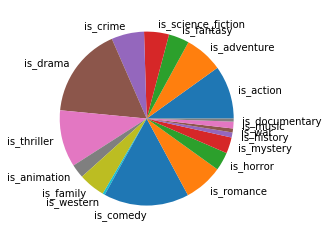

In [5]:
sum_df = main_df.apply(np.sum,axis = 0)
#genres pie chart
plt.pie(sum_df[5:-7],labels = sum_df.index[5:-7])
plt.show()

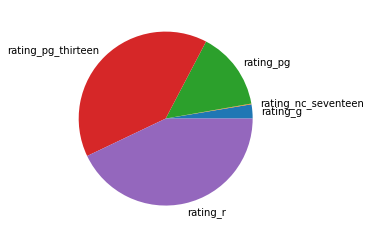

In [6]:
#mpaa ratings pie chart
plt.pie(sum_df[-7:-2],labels = sum_df.index[-7:-2])
plt.show()

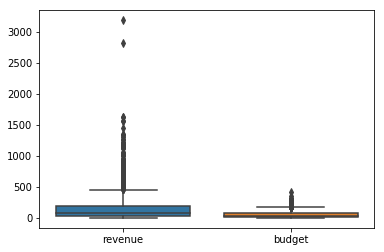

In [7]:
sns.boxplot(data = main_df[['revenue','budget']])
plt.show()

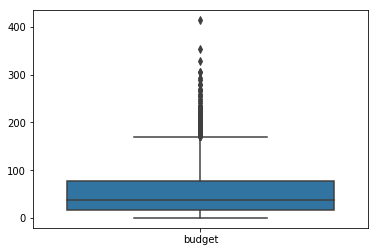

In [8]:
sns.boxplot(data = main_df[['budget']])
plt.show()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


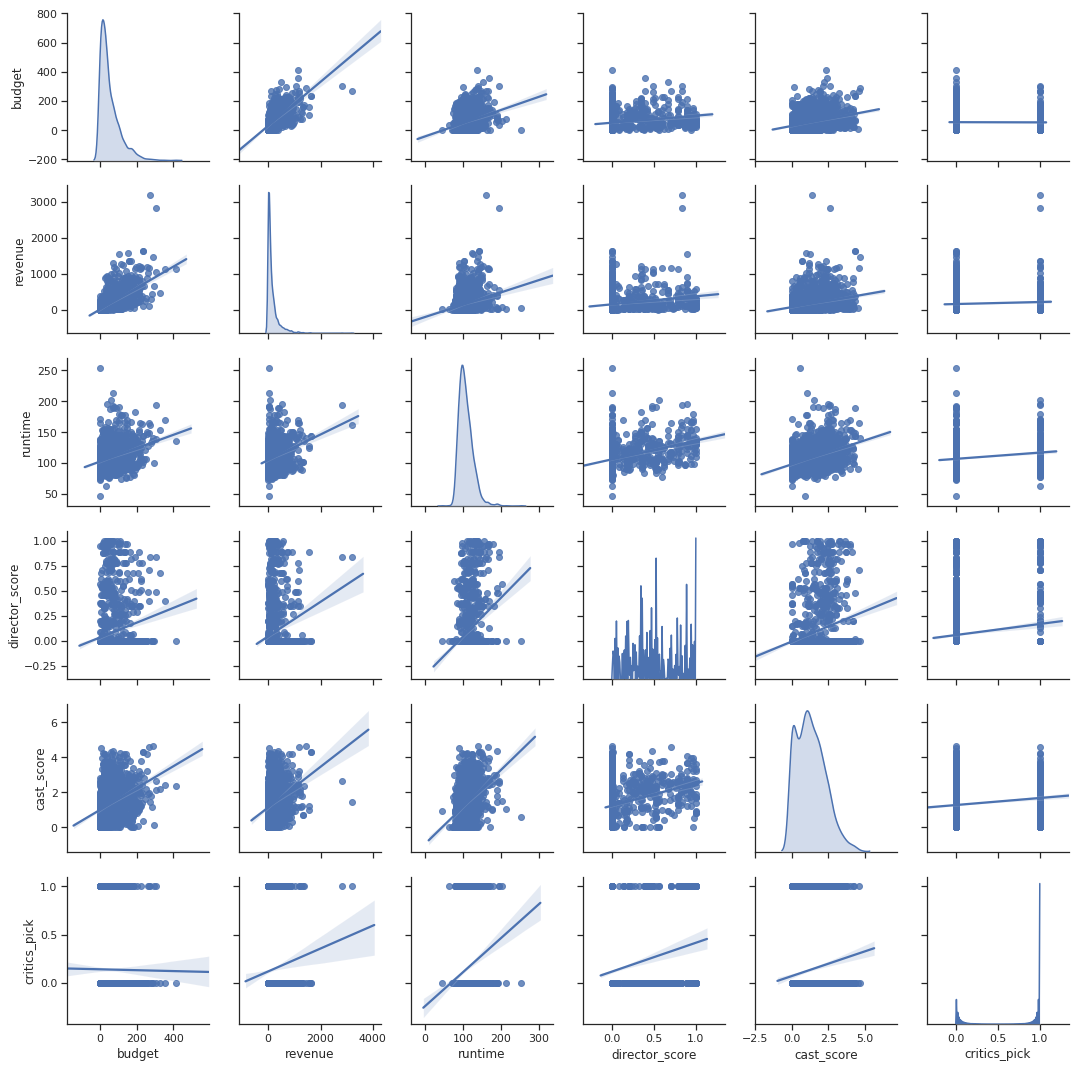

In [9]:
sns.set(style="ticks", color_codes=True)
#plt.scatter(main_df['budget'],main_df['revenue'])
sns.pairplot(main_df[['budget','revenue','runtime','director_score','cast_score','critics_pick']],kind='reg',diag_kind='kde')

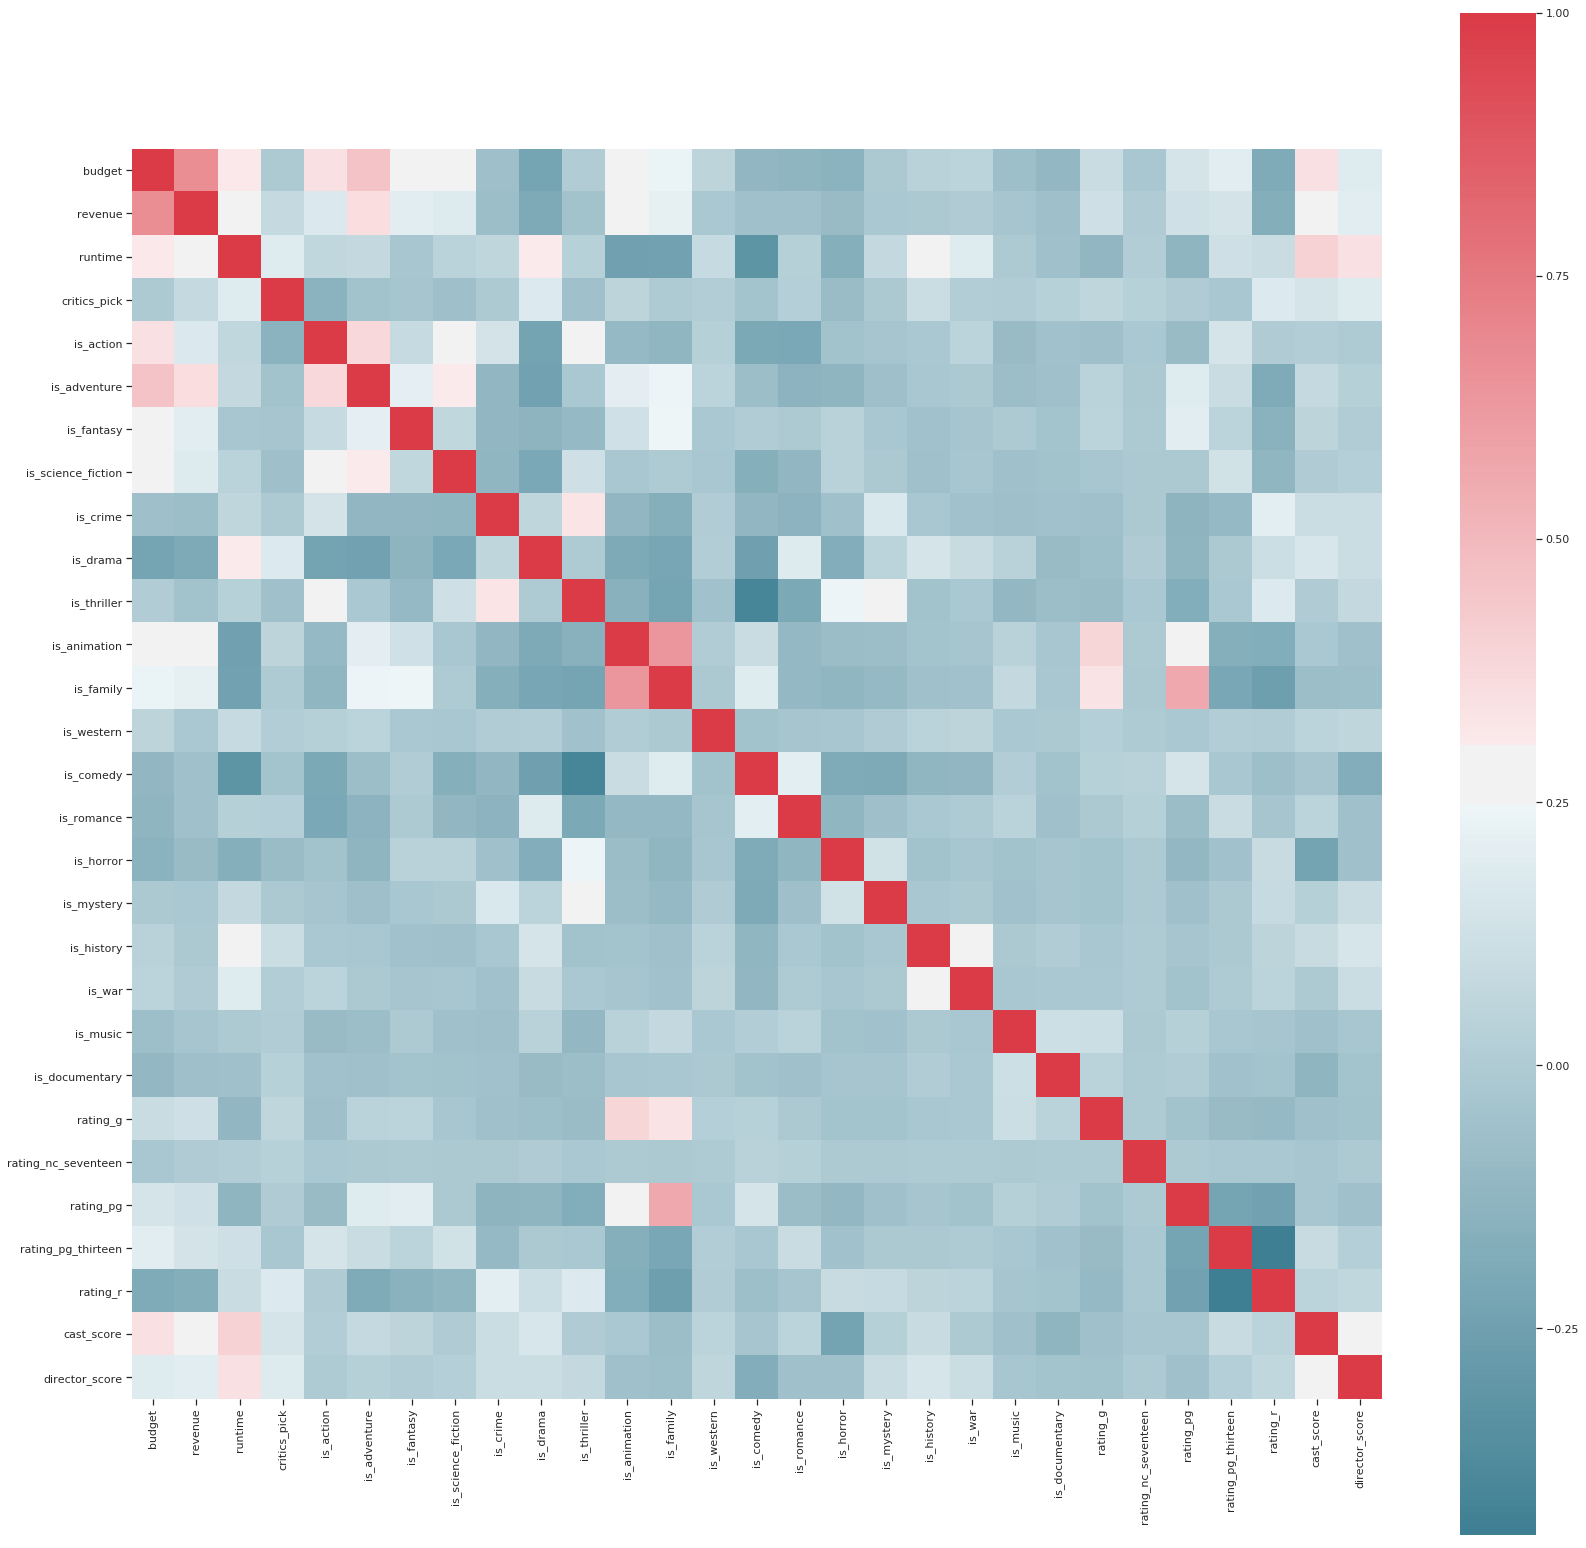

In [10]:
corr = main_df.corr()
plt.figure(figsize = (28,28))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)


## Feature Analysis

total in test set: 2035
percent with less than 0.2 error: 708
accuracy: 0.34791154791154794
                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     237.8
Date:                Tue, 30 Oct 2018   Prob (F-statistic):          1.33e-184
Time:                        16:26:33   Log-Likelihood:                -9433.1
No. Observations:                1424   AIC:                         1.888e+04
Df Residuals:                    1418   BIC:                         1.891e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

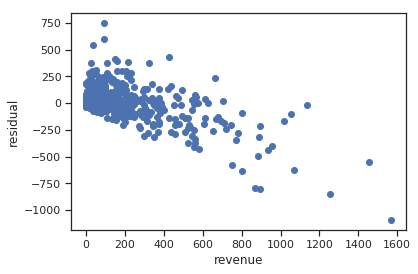

In [199]:
x_df = main_df.drop(columns=['revenue','title'])
x_df.drop(columns=['rating_g' ,'rating_nc_seventeen', 'rating_pg', 'rating_pg_thirteen', 'rating_r'],inplace=True)
y_df = main_df['revenue']
x_train,x_test,y_train,y_test = train_test_split(x_df,y_df,test_size = 0.3,random_state=0)
x_train.head()
ols_train = x_train.copy()
ols_train['revenue'] = y_train
limit = 0.2 #error allowed

#bench mark against just predicting mean
error_rate = (y_df.mean() - y_df)/y_df
print('total in test set: ' +str(len(y_df)))
valid_predictions = np.sum(error_rate < limit)
print('percent with less than {} error: '.format(limit) + str(valid_predictions))
print('accuracy: ' + str(valid_predictions/len(y_df)))

def evaluate_ols_results(results):
    print(results.summary())
    predictions = results.predict(x_test)
    plt.scatter(y_test, predictions - y_test)

    error_rate = (predictions - y_test)/y_test
    correct_predictions = np.sum(error_rate < limit)
    print(correct_predictions, correct_predictions/len(y_test))
    plt.xlabel('revenue')
    plt.ylabel('residual')
    plt.show()
    
formula = '''revenue ~ runtime + budget + critics_pick + cast_score + director_score'''

results = smf.ols(formula, data=ols_train).fit()
evaluate_ols_results(results)



                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     294.1
Date:                Tue, 30 Oct 2018   Prob (F-statistic):          2.84e-184
Time:                        16:26:33   Log-Likelihood:                -9436.8
No. Observations:                1424   AIC:                         1.888e+04
Df Residuals:                    1419   BIC:                         1.891e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -88.3987     29.958     -2.

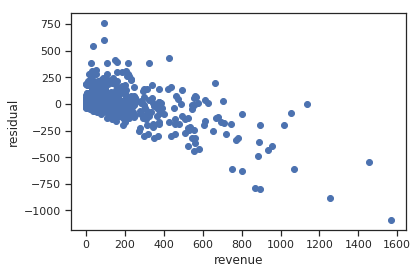

In [200]:
formula1 = '''revenue ~ critics_pick + budget + cast_score + director_score'''
formula2 = '''revenue ~ budget + runtime + cast_score + director_score'''

formula3 = '''revenue ~ 
                    budget + critics_pick + cast_score + director_score
                    + budget * critics_pick + budget * cast_score + budget * director_score
                    + critics_pick * cast_score + critics_pick * director_score
                    + cast_score * director_score
                    + np.power(budget,2) + np.power(critics_pick,2) + np.power(cast_score,2) + np.power(director_score,2)
                    '''

results = smf.ols(formula2, data=ols_train).fit()
evaluate_ols_results(results)

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     26.99
Date:                Tue, 30 Oct 2018   Prob (F-statistic):          1.56e-298
Time:                        16:26:34   Log-Likelihood:                -13128.
No. Observations:                2035   AIC:                         2.646e+04
Df Residuals:                    1932   BIC:                         2.704e+04
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

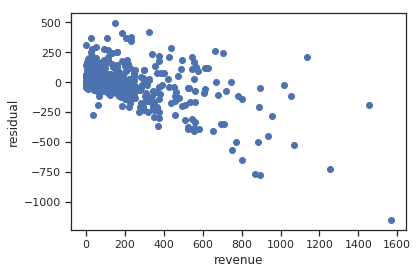

In [201]:
formula = '''revenue ~ 
                    budget + runtime + critics_pick
                    + is_action + is_adventure+is_fantasy+is_science_fiction + is_crime + is_drama + is_thriller + is_animation + is_family + is_western + is_comedy + is_romance + is_horror + is_mystery + is_history + is_war + is_music + is_documentary                
                    + cast_score + director_score
                    
                    + is_action * cast_score
                    + is_science_fiction * cast_score
                    + is_crime * cast_score
                    + is_drama * cast_score
                    + is_thriller * cast_score
                    + is_western * cast_score
                    + is_comedy * cast_score
                    + is_romance * cast_score
                    + is_horror * cast_score
                    + is_mystery * cast_score
                    + is_history * cast_score
                    + is_war * cast_score 
                    + is_music * cast_score
                    + is_documentary * cast_score
                    + is_adventure * cast_score
                    + is_fantasy * cast_score
                    + is_animation * cast_score
                    
                    + budget * cast_score
                    + budget * director_score
                    + budget * runtime
                    + budget * critics_pick
                    + is_action * budget
                    + is_science_fiction * budget
                    + is_crime * budget
                    + is_drama * budget
                    + is_thriller * budget
                    + is_western * budget
                    + is_comedy * budget
                    + is_romance * budget
                    + is_horror * budget
                    + is_mystery * budget
                    + is_history * budget
                    + is_war * budget 
                    + is_music * budget
                    + is_documentary * budget
                    + is_adventure * budget
                    + is_fantasy * budget
                    + is_animation * budget
                    
                    + director_score * cast_score
                    + director_score * runtime
                    + budget * director_score
                    + director_score * critics_pick
                    + is_action * director_score
                    + is_science_fiction * director_score
                    + is_crime * director_score
                    + is_drama * director_score
                    + is_thriller * director_score
                    + is_western * director_score
                    + is_comedy * director_score
                    + is_romance * director_score
                    + is_horror * director_score
                    + is_mystery * director_score
                    + is_history * director_score
                    + is_war * director_score 
                    + is_music * director_score
                    + is_documentary * director_score
                    + is_adventure * director_score
                    + is_fantasy * director_score
                    + is_animation * director_score
                    
                    + critics_pick * cast_score
                    + critics_pick * runtime
                    + budget * critics_pick
                    + director_score * critics_pick
                    + is_action * critics_pick
                    + is_science_fiction * critics_pick
                    + is_crime * critics_pick
                    + is_drama * critics_pick
                    + is_thriller * critics_pick
                    + is_western * critics_pick
                    + is_comedy * critics_pick
                    + is_romance * critics_pick
                    + is_horror * critics_pick
                    + is_mystery * critics_pick
                    + is_history * critics_pick
                    + is_war * critics_pick 
                    + is_music * critics_pick
                    + is_documentary * critics_pick
                    + is_adventure * critics_pick
                    + is_fantasy * critics_pick
                    + is_animation * critics_pick
                    
                    + np.power(budget,2)
                    + np.power(cast_score,2)
                    + np.power(director_score,2)
                    '''
results = smf.ols(formula, data=main_df).fit()
evaluate_ols_results(results)
    
    

## Predictive Modelling

In [202]:
def evaluate_model(model,X,Y):
    if hasattr(model,'coef_'):
        print('Intercept: ' + str(model.intercept_))
        print('\nCoefficients: ' + str([l + ': ' + str(c) for l,c in zip(x_train.columns,model.coef_)]))
        print('\nR-Squared: ' + str(model.score(x_test,y_test)))
    print('\nResidual Plot')
    plt.scatter(Y, (model.predict(X) - Y))
    error_rate = (model.predict(X) - Y)/Y
    print('total in test set: ' +str(len(Y)))
    valid_predictions = np.sum(error_rate < limit)
    print('percent with less than {} error: '.format(limit) + str(valid_predictions))
    print('accuracy: ' + str(valid_predictions/len(Y)))
    plt.xlabel('revenue')
    plt.ylabel('residual')
    plt.show()


0.05385543850243768

Residual Plot
total in test set: 611
percent with less than 0.2 error: 368
accuracy: 0.602291325695581


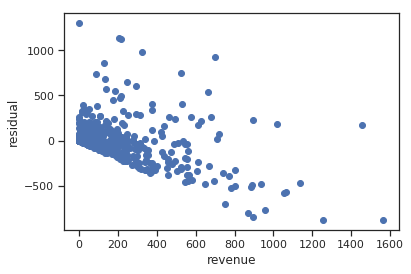

In [203]:
tree_model = DecisionTreeRegressor()
tree_model.fit(x_train,y_train)
print(tree_model.score(x_test,y_test))
evaluate_model(tree_model, x_test,y_test)
tree.export_graphviz(tree_model, out_file='tree.dot',feature_names = x_train.columns) 

0.35695434627333467

Residual Plot
total in test set: 611
percent with less than 0.2 error: 194
accuracy: 0.31751227495908346


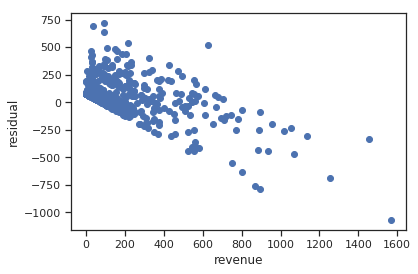

In [204]:
ada_model = AdaBoostRegressor()
ada_model.fit(x_train,y_train)
print(ada_model.score(x_test,y_test))
evaluate_model(ada_model, x_test,y_test)

-0.0766122375241214

Residual Plot
total in test set: 611
percent with less than 0.2 error: 357
accuracy: 0.5842880523731587


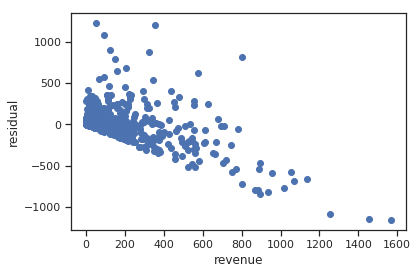

In [213]:
knn_model = KNeighborsRegressor(n_neighbors = 1)
knn_model.fit(x_train,y_train)
print(knn_model.score(x_test,y_test))
evaluate_model(knn_model, x_test,y_test)

In [196]:
mlp = MLPClassifier(hidden_layer_sizes=(50,),max_iter = 1000)
mlp.fit(x_train,y_train)
print(mlp.score(x_test,y_test))
evaluate_model(mlp, x_test,y_test)

ValueError: Unknown label type: (array([ 38.08281839,  41.21666857, 543.18534423, ...,   0.9173886 ,
       214.18386918, 297.38906683]),)

In [ ]:
mlp_r = MLPRegressor(hidden_layer_sizes=(5,3),max_iter = 2000)
mlp_r.fit(x_train,y_train)
print(mlp_r.score(x_test,y_test))
evaluate_model(mlp_r, x_test,y_test)

## Helper functions
Functions for retrieving data from NYT movies API and OMDB API. Results are saved in csv files.

In [ ]:
#Codes for scraping, dont run. saved to csv file.
NYT_API_KEY = '53223e11b006467490bde835d45b0c74'

all_ny_df = []
for offset in range(0,8000,20):
    url = 'http://api.nytimes.com/svc/movies/v2/reviews/search.json?opening-date=1990-01-01;2016-12-31&offset={0}&api-key=ae71411b586e4f9c82502e7e782b122d'.format(offset)
    ny_json = pd.read_json(url, orient = 'records')
    ny_df = json_normalize(ny_json['results'])
    if ny_df.empty:
        break
    all_ny_df.append(ny_df)

ny_df = pd.concat(all_ny_df)
print(ny_df.tail())
ny_df.to_csv('NY Movie Reviews.csv')


title = 't=' + nytdata['display_title'][1].replace(' ', '+')
req = 'http://www.omdbapi.com/?apikey='+ OMDB_API_KEY + '&'+ title
print(pd.read_json(req))

In [ ]:
OMDB_API_KEY = 'd42886f4'

def fetch_omdb(title):
    title = 't=' + title.replace(' ', '+')
    print (title)
    req = 'http://www.omdbapi.com/?apikey='+ OMDB_API_KEY + '&'+ title
    omdb_df = pd.read_json(req)
    return omdb_df

count = 0
omdb_df_list = []
for title in tmdb_df['title'].tolist():
    count += 1
    omdb_df_list.append(fetch_omdb(title))
    if count > 5:
        break
        
complete = pd.concat(omdb_df_list,axis=0)
complete.to_csv('omdb_data.csv')
